In [8]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [9]:
import sys, random
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c
from my_code import pytorch_model as m
from my_code import quantum_nodes as q

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# name of the notebook
name_notebook = "sweep_6h_e_1qm_oi_v2"

In [11]:
# sweep = c.Sweep(
#     name_notebook, 
#     initial_path=initial_path,
#     description="(6aa, 6q) (generate inputs) Try to find best number of q. layers, and type of Anzatz.",
#     repetitions=list(range(1, 4)),
#     ansatz=[q.parts.Ansatz_11, q.parts.Ansatz_full_conn, q.parts.Ansatz_11_2],
#     block_n_layers=[4,9,14,19,24,29],
# )

In [12]:
# sweep.save()

In [13]:
sweep = c.Sweep.load(file_name=name_notebook+"-1", day='1004', initial_path=initial_path)



 --- SWEEP POINT 1/54: (1, <class 'my_code.quantum_nodes.parts.Ansatz_11'>, 4) ---
 --- parameters sweeping: ['repetitions', 'ansatz', 'block_n_layers'] 

Epoch [0/20], Loss epoch: 144.1630, Loss validation: 143.9247
	 Validation string, 	 i: 29; 	 prediction: -9.4306, 	 target: -13.7700, 	 loss: 18.8304
	 Validation string, 	 i: 110; 	 prediction: -7.2090, 	 target: -11.1600, 	 loss: 15.6102
	 Validation string, 	 i: 59; 	 prediction: -8.1137, 	 target: -15.8400, 	 loss: 59.6956
Epoch [1/20], Loss epoch: 49.7211, Loss validation: 23.6043, Time remaining: ~0.0h 8.0m 56s
	 Validation string, 	 i: 65; 	 prediction: -11.0124, 	 target: -20.1300, 	 loss: 83.1300
	 Validation string, 	 i: 120; 	 prediction: -7.2585, 	 target: -13.3900, 	 loss: 37.5954
	 Validation string, 	 i: 48; 	 prediction: -14.3833, 	 target: -17.4400, 	 loss: 9.3434
Epoch [2/20], Loss epoch: 27.1757, Loss validation: 20.6092, Time remaining: ~0.0h 8.0m 2s
	 Validation string, 	 i: 122; 	 prediction: -8.1056, 	 targe

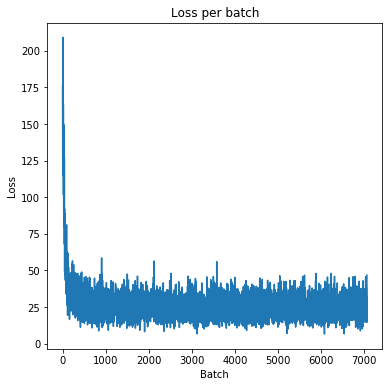

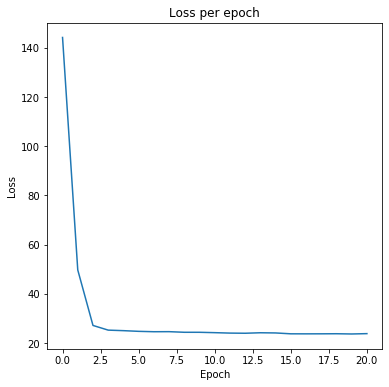

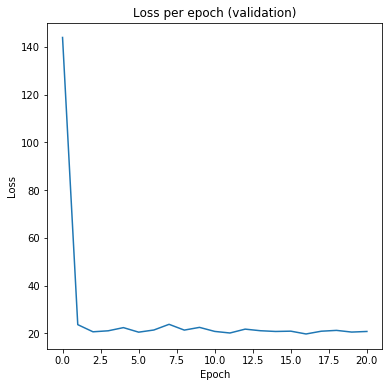

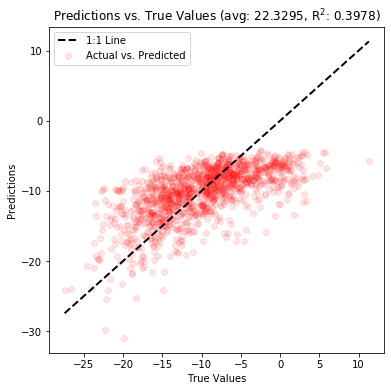

Mean loss: 22.32947328080049, std loss: 32.45506775453976, r^2: 0.3978343281891803
Folder 'peptide-QML/saved/Results/1004/' created successfully.
Folder 'peptide-QML/saved/Input_optimization/1004/' created successfully.s generated. Score -6.307389217743394. 	 Time remaining: 0.10 min 			 
Best score: -57.40734787187659 						  


 --- SWEEP POINT 2/54: (1, <class 'my_code.quantum_nodes.parts.Ansatz_11'>, 9) ---
 --- time reamining: 10:42:50.58 

Epoch [0/20], Loss epoch: 136.2594, Loss validation: 136.3407
	 Validation string, 	 i: 94; 	 prediction: -9.9547, 	 target: -5.8800, 	 loss: 16.6031
	 Validation string, 	 i: 4; 	 prediction: -9.2554, 	 target: -5.8800, 	 loss: 11.3933
	 Validation string, 	 i: 57; 	 prediction: -6.0274, 	 target: -10.8700, 	 loss: 23.4503
Epoch [1/20], Loss epoch: 45.4481, Loss validation: 21.3109, Time remaining: ~0.0h 17.0m 3s
	 Validation string, 	 i: 117; 	 prediction: -16.1627, 	 target: -18.1000, 	 loss: 3.7530
	 Validation string, 	 i: 96; 	 prediction

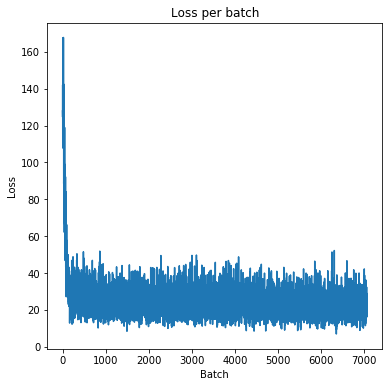

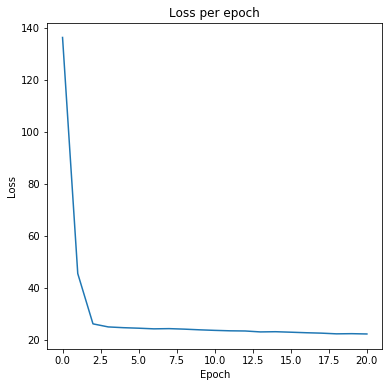

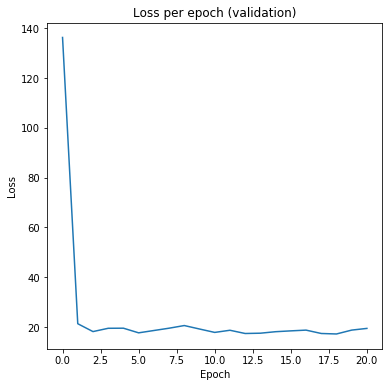

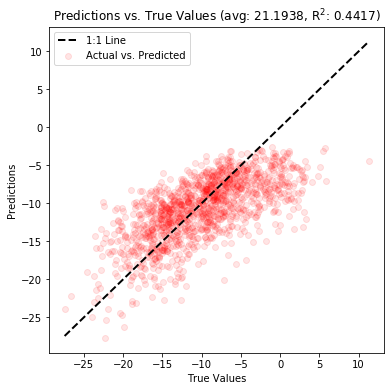

Mean loss: 21.193801059667255, std loss: 31.69188727117448, r^2: 0.4416827524761623
Best score: -40.24422656279089 						                   20/20 peptides generated. Score -40.24422656279089. 	 Time remaining: 0.24 min 			 


 --- SWEEP POINT 3/54: (1, <class 'my_code.quantum_nodes.parts.Ansatz_11'>, 14) ---
 --- time reamining: 15:03:35.71 

Epoch [0/20], Loss epoch: 139.3057, Loss validation: 139.6238
	 Validation string, 	 i: 102; 	 prediction: -12.0016, 	 target: -10.0700, 	 loss: 3.7313
	 Validation string, 	 i: 31; 	 prediction: -8.5391, 	 target: -4.1100, 	 loss: 19.6169
	 Validation string, 	 i: 124; 	 prediction: -5.0516, 	 target: -7.4900, 	 loss: 5.9458
Epoch [1/20], Loss epoch: 47.5608, Loss validation: 16.3148, Time remaining: ~0.0h 26.0m 47s
	 Validation string, 	 i: 42; 	 prediction: -11.1762, 	 target: -13.2800, 	 loss: 4.4261
	 Validation string, 	 i: 76; 	 prediction: -4.3123, 	 target: -2.9100, 	 loss: 1.9665
	 Validation string, 	 i: 94; 	 prediction: -6.7461, 	 tar

In [14]:
for sweep_point in sweep.points_left:

    # print the point of the sweep
    sweep.print_sweep_status(sweep_point['idx'])

    # -- QUANTUM BLOCK -- #
    n_qubits = 6
    quantum_layer = q.circuit(
        n_qubits = n_qubits, 
        device = "default.qubit.torch",
        device_options = {'shots': None},
        embedding = q.parts.AngleEmbedding,
        # embedding_ansatz = sweep_point['ansatz'],
        block_ansatz = sweep_point['ansatz'],
        final_ansatz = sweep_point['ansatz'], 
        measurement = q.parts.Measurement('Z', 1),
        # embedding_n_layers = sweep_point['embedding_n_layers'],
        # different_inputs_per_layer = False,
        block_n_layers = sweep_point['block_n_layers'],
        # wrapper_qlayer = pw.QLayerEmpty,
    )

    # -- MODEL -- #   

    class Tan(m.nn.Module):
        def __init__(self):
            super(Tan, self).__init__()
            self.A = m.nn.Parameter(m.torch.tensor(1.0))  # Initialize A as a learnable parameter

        def forward(self, x):
            return self.A * m.torch.tan(x * m.np.pi / 2)    
                
    class Model(m.Model):
        def __init__(self):
            super(Model, self).__init__()
            self.fc1 = m.nn.Embedding(num_embeddings=19, embedding_dim=1)
            self.fc2 = m.Reshape()
            self.fc3 = quantum_layer()            
            self.fc4 = Tan()

        def forward(self, x):
            for i in [1,2,3,4]:
                x = getattr(self, 'fc{}'.format(i))(x)
            return x

    model = Model()

    # set seed
    seed_random = random.randint(0, 1000000)
    m.torch.manual_seed(seed_random)

    # set quantum layer
    model.set_quantum_layer(quantum_layer)

    # set the name and path of the model
    model.set_name_and_path(name_notebook, initial_path)

    #set sweep point
    model.set_sweep_point(
        sweep_uuid = sweep.uuid,
        sweep_point = sweep_point,
        day=sweep.day
    )

    # -- TRAIN -- #
    model.optimize_params(
        #save info
        save_model_info = True,
        description = 'sweep with 6 aa and 6 q -> Try to find best number of q. layers, measurement, and type of Anzatz.',    
        #data
        data=c.Data.load(initial_path=initial_path, file_name='PE_SCORES_6_Numbers'),
        # train options
        optimizer = m.optim.Adam,
        optimizer_options = {'lr': 0.01},
        num_epochs = 20,                
        batch_size = 32,
        # early stopping options
        stop_training_options = {
            'lookback_epochs': 5, 
            'threshold_slope': 0.001,
            'threshold_std_dev': 0.2
        },
        # metadata
        metadata = {
            'seed_random': seed_random,
            'Tan_layer': 'A * tan(x * pi/2)',
        }
    )

    # load best model
    model.load_state_dict_from_results(state_dict_name="parameters_epoch", rule="best")

    # -- VALIDATION and PLOTS -- #
    model.plot_losses(fig_size=(6,6))
    model.validate(
        pct=1,
        add_to_results=True,
        plot=True,
        print_items=False
    )

    # -- SAVE RESULTS -- #
    model.save_results()

    # -- GENERATE PEPTIDES and SAVE THEM -- #    
    oi_time = m.t.time()
    n_peptides = 20
    for i in range(n_peptides):
        model.get_input_with_low_score(
            layers_to_use = ['fc3', 'fc4'],
            n_iter = 1000,
            optimizer = m.torch.optim.Adam,
            optimizer_options = {'lr': 0.1},
            stop_criterion = 1e-3,
            initialization_seed = i,
        )
        print("{}/{} peptides generated. Score {}. \t Time remaining: {:.2f} min \t\t\t ".format(
            i+1, n_peptides, model.optimized_inputs[-1][1], (n_peptides-i)*(m.t.time() - oi_time)/(i+1)/60
        ), end='\r')
    oi_time = m.t.time() - oi_time
    model.save_input_optimization_results()
    best_oi, best_oi_score = model.best_optimized_input
    print("Best score: {} \t\t\t\t\t\t  ".format(best_oi_score))

    # -- ADD DATA GENERATED TO SWEEP -- #
    sweep.add_data(
        idx=sweep_point['idx'],
        model_uuid=model.uuid,
        best_loss_train=model.results.loss_epoch.best,
        best_loss_test=model.results.loss_validation_epoch.best,
        loss_validation=model.mean_loss_validation,
        loss_validation_r_squared=model.results.validation['r_squared'],
        n_parameters=model.n_parameters,
        time_train=model.results.time_epoch.last,
        best_oi=best_oi,
        best_oi_score=best_oi_score,
        oi_time=oi_time,
    )
    sweep.save(csv=False) #TODO: save csv=False automatically when sweep is already saved ion csv

    